# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


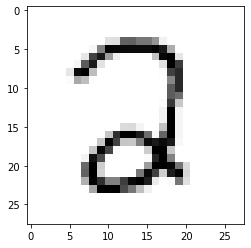

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2389
Training Accuracy: 0.7085, Testing Accuracy: 0.7177



Epoch 10, Loss 0.1443
Training Accuracy: 0.9043, Testing Accuracy: 0.9199



Epoch 20, Loss 0.0732
Training Accuracy: 0.9296, Testing Accuracy: 0.9471



Epoch 30, Loss 0.0515
Training Accuracy: 0.9453, Testing Accuracy: 0.9567



Epoch 40, Loss 0.042
Training Accuracy: 0.9529, Testing Accuracy: 0.9647



Epoch 50, Loss 0.0369
Training Accuracy: 0.9574, Testing Accuracy: 0.9682



Epoch 60, Loss 0.0337
Training Accuracy: 0.9614, Testing Accuracy: 0.9698



Epoch 70, Loss 0.0315
Training Accuracy: 0.9640, Testing Accuracy: 0.9703



Epoch 80, Loss 0.0298
Training Accuracy: 0.9659, Testing Accuracy: 0.9708



Epoch 90, Loss 0.0284
Training Accuracy: 0.9670, Testing Accuracy: 0.9713



Epoch 100, Loss 0.0273
Training Accuracy: 0.9687, Testing Accuracy: 0.9713



Epoch 110, Loss 0.0263
Training Accuracy: 0.9697, Testing Accuracy: 0.9733



Epoch 120, Loss 0.0255
Training Accuracy: 0.9710, Testing Accuracy: 0.9743



Epoch 130, Loss 0.0248
Training Accuracy: 0.9717, Testing Accuracy: 0.9743



Epoch 140, Loss 0.0241
Training Accuracy: 0.9725, Testing Accuracy: 0.9748



Epoch 150, Loss 0.0235
Training Accuracy: 0.9738, Testing Accuracy: 0.9748



Epoch 160, Loss 0.0229
Training Accuracy: 0.9741, Testing Accuracy: 0.9748



Epoch 170, Loss 0.0224
Training Accuracy: 0.9747, Testing Accuracy: 0.9743



Epoch 180, Loss 0.0219
Training Accuracy: 0.9751, Testing Accuracy: 0.9743



Epoch 190, Loss 0.0214
Training Accuracy: 0.9756, Testing Accuracy: 0.9743



Epoch 200, Loss 0.021
Training Accuracy: 0.9760, Testing Accuracy: 0.9738



Epoch 210, Loss 0.0206
Training Accuracy: 0.9765, Testing Accuracy: 0.9743



Epoch 220, Loss 0.0202
Training Accuracy: 0.9773, Testing Accuracy: 0.9743



Epoch 230, Loss 0.0198
Training Accuracy: 0.9779, Testing Accuracy: 0.9743



Epoch 240, Loss 0.0195
Training Accuracy: 0.9785, Testing Accuracy: 0.9748



0.05985712720929513

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2406
Training Accuracy: 0.6935, Testing Accuracy: 0.7046



Epoch 10, Loss 0.1031
Training Accuracy: 0.9054, Testing Accuracy: 0.9133



Epoch 20, Loss 0.0798
Training Accuracy: 0.9243, Testing Accuracy: 0.9355



Epoch 30, Loss 0.0688
Training Accuracy: 0.9347, Testing Accuracy: 0.9451



Epoch 40, Loss 0.0621
Training Accuracy: 0.9396, Testing Accuracy: 0.9516



Epoch 50, Loss 0.0575
Training Accuracy: 0.9434, Testing Accuracy: 0.9546



Epoch 60, Loss 0.0541
Training Accuracy: 0.9455, Testing Accuracy: 0.9561



Epoch 70, Loss 0.0515
Training Accuracy: 0.9478, Testing Accuracy: 0.9577



Epoch 80, Loss 0.0494
Training Accuracy: 0.9499, Testing Accuracy: 0.9592



Epoch 90, Loss 0.0477
Training Accuracy: 0.9518, Testing Accuracy: 0.9597



Epoch 100, Loss 0.0462
Training Accuracy: 0.9528, Testing Accuracy: 0.9597



Epoch 110, Loss 0.045
Training Accuracy: 0.9536, Testing Accuracy: 0.9607



Epoch 120, Loss 0.0439
Training Accuracy: 0.9548, Testing Accuracy: 0.9617



Epoch 130, Loss 0.0429
Training Accuracy: 0.9554, Testing Accuracy: 0.9627



Epoch 140, Loss 0.0421
Training Accuracy: 0.9565, Testing Accuracy: 0.9632



Epoch 150, Loss 0.0413
Training Accuracy: 0.9566, Testing Accuracy: 0.9637



Epoch 160, Loss 0.0406
Training Accuracy: 0.9579, Testing Accuracy: 0.9647



Epoch 170, Loss 0.04
Training Accuracy: 0.9582, Testing Accuracy: 0.9652



Epoch 180, Loss 0.0394
Training Accuracy: 0.9585, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0389
Training Accuracy: 0.9587, Testing Accuracy: 0.9652



Epoch 200, Loss 0.0384
Training Accuracy: 0.9589, Testing Accuracy: 0.9657



Epoch 210, Loss 0.038
Training Accuracy: 0.9599, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0376
Training Accuracy: 0.9599, Testing Accuracy: 0.9667



Epoch 230, Loss 0.0372
Training Accuracy: 0.9605, Testing Accuracy: 0.9672



Epoch 240, Loss 0.0368
Training Accuracy: 0.9609, Testing Accuracy: 0.9677



0.037740953007444636

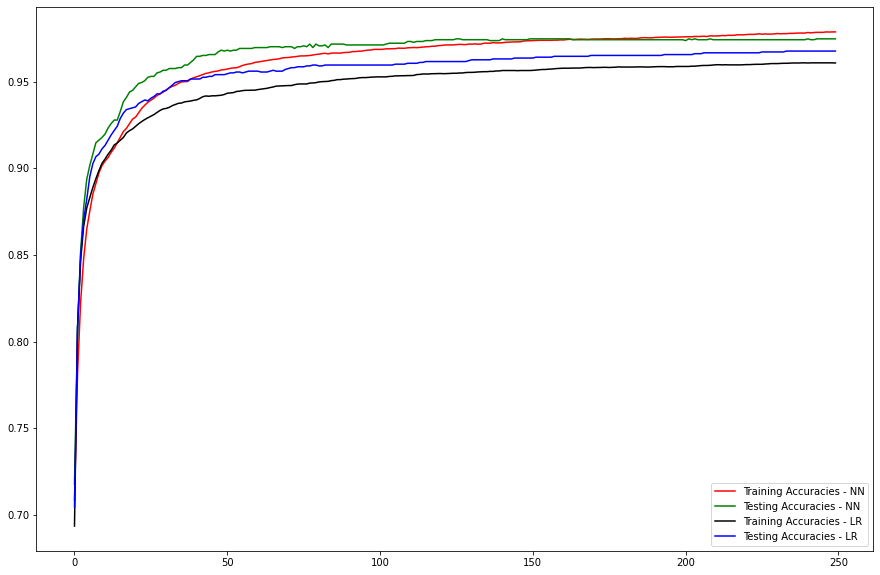

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

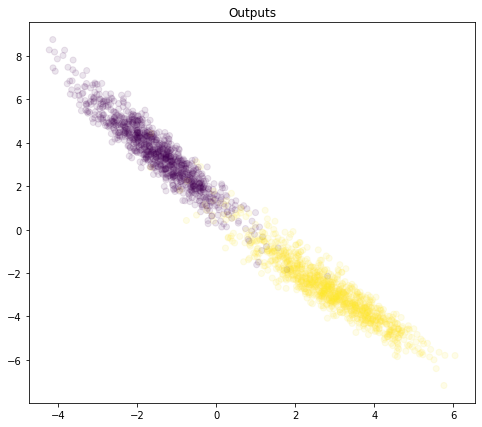

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

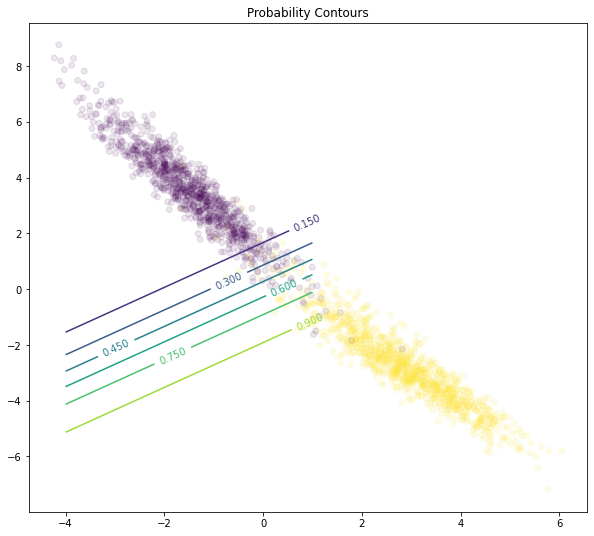

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );